# Demonstrate The Central Limit Theorem


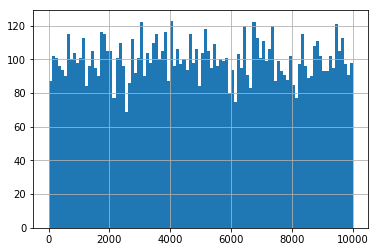

In [1]:
# Import packages
import pandas as pd
import numpy as np

# Set matplotlib as inline
%matplotlib inline  

# Create Population Data From Non-Normal Distribution
# Create an empty dataframe
population = pd.DataFrame()

# Create an column that is 10000 random numbers drawn from a uniform distribution
population['numbers'] = np.random.uniform(0,10000,size=10000)

# Plot a histogram of the score data.
# This confirms the data is not a normal distribution.
population['numbers'].hist(bins=100)

In [2]:
# View the True Mean Of Population
# View the mean of the numbers
population['numbers'].mean()

4995.682016673781

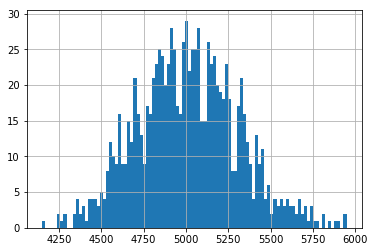

In [4]:
# Take A Sample Mean, Repeat 1000 Times
# Create a list
sampled_means = []

# For 1000  times,
for i in range(0,1000):
    # Take a random sample of 100 rows from the population, take the mean of those rows, append to sampled_means
    sampled_means.append(population.sample(n=100).mean().values[0])
    
    
# Plot The Sample Means Of All 100 Samples
# Plot a histogram of sampled_means. 
# It is clearly normally distributed and centered around 5000
pd.Series(sampled_means).hist(bins=100)

This is the critical chart, remember that the population distribution was uniform, however, this distribution is approaching normality. This is the key point to the central limit theory, and the reason we can assume sample means are not bias.

In [5]:
# View The Mean Sample Mean
# View the mean of the sampled_means
pd.Series(sampled_means).mean()

5011.339029441697

In [7]:
# Compare To True Mean
# Subtract Mean Sample Mean From True Population Mean
error = population['numbers'].mean() - pd.Series(sampled_means).mean()

# Print
print('The Mean Sample Mean is only %f different the True Population mean!' % error)

The Mean Sample Mean is only -15.657013 different the True Population mean!


# Pearsons Correlation Coefficient


In [12]:
import statistics as stats

# Create Data
x = [1,2,3,4,5,6,7,8,9]
y = [2,1,2,4.5,7,6.5,6,9,9.5]

<img src="pearson.png" width= 800 >

In [13]:
# Create a function
def pearson(x,y):
    
    # Create n, the number of observations in the data
    n = len(x)
    
    # Create lists to store the standard scores
    standard_score_x = []
    standard_score_y = []
    
    # Calculate the mean of x
    mean_x = stats.mean(x)
    
    # Calculate the standard deviation of x
    standard_deviation_x = stats.stdev(x)
    
    # Calculate the mean of y
    mean_y = stats.mean(y)
    
    # Calculate the standard deviation of y
    standard_deviation_y = stats.stdev(y)

    # For each observation in x
    for observation in x: 
        
        # Calculate the standard score of x
        standard_score_x.append((observation - mean_x)/standard_deviation_x) 

    # For each observation in y
    for observation in y:
        
        # Calculate the standard score of y
        standard_score_y.append((observation - mean_y)/standard_deviation_y)

    # Multiple the standard scores together, sum them, then divide by n-1, return that value
    return (sum([i*j for i,j in zip(standard_score_x, standard_score_y)]))/(n-1)

In [14]:
# Show Pearson's Correlation Coefficient
pearson(x,y)

0.9412443251336238

# Probability Mass Functions

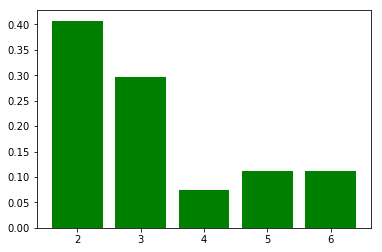

In [18]:
# Load libraries
import matplotlib.pyplot as plt

# Create Data
# Create some random integer data
data = [3,2,3,4,2,3,5,2,2,3,3,5,2,2,5,6,2,2,2,3,6,6,2,4,3,2,3]

# Create A Count Of Values
# Create a dictionary to store the counts
count = {}

# For each value in the data
for observation in data:
    # An a key, value pair, with the observation being the key
    # and the value being +1
    count[observation] = count.get(observation, 0) + 1
    
# Normalize The Count To Between 0 and 1
# Calculate the number of observations
n = len(data)

# Create a dictionary
probability_mass_function = {}

# For each unique value,
for unique_value, count in count.items():
    # Normalize the count by dividing by the length of data, add to the PMC dictionary
    probability_mass_function[unique_value] = count / n
    
# Visualize The PMF
# Plot the probability mass function
plt.bar(list(probability_mass_function.keys()), probability_mass_function.values(), color='g')
plt.show()

# Spearmans Rank Correlation
Spearman’s rank correlation is the Pearson’s correlation coefficient of the ranked version of the variables.


In [19]:
import numpy as np
import pandas as pd
import scipy.stats

# Create Data
# Create two lists of random values
x = [1,2,3,4,5,6,7,8,9]
y = [2,1,2,4.5,7,6.5,6,9,9.5]

In [20]:
# Create a function that takes in x's and y's
def spearmans_rank_correlation(xs, ys):
    
    # Calculate the rank of x's
    xranks = pd.Series(xs).rank()
    
    # Caclulate the ranking of the y's
    yranks = pd.Series(ys).rank()
    
    # Calculate Pearson's correlation coefficient on the ranked versions of the data
    return scipy.stats.pearsonr(xranks, yranks)
# Run the function
spearmans_rank_correlation(x, y)[0]


0.90377360145618091

In [21]:
# Calculate Spearman’s Correlation Using SciPy
# Just to check our results, here it Spearman's using Scipy
scipy.stats.spearmanr(x, y)[0]

0.90377360145618102

# T-tests
## One Sample Two-Sided T-Test
Imagine the one sample T-test and drawing a (normally shaped) hill centered at 1 and “spread” out with a standard deviation of 1.5, then placing a flag at 0 and looking at where on the hill the flag is location. Is it near the top? Far away from the hill? If the flag is near the very bottom of the hill or farther, then the t-test p-score will be below 0.05.

In [24]:
from scipy import stats
import numpy as np

# Create Data
# Create a list of 20 observations drawn from a random distribution 
# with mean 1 and a standard deviation of 1.5
x = np.random.normal(1, 1.5, 20)

# Create a list of 20 observations drawn from a random distribution 
# with mean 0 and a standard deviation of 1.5
y = np.random.normal(0, 1.5, 20)

In [25]:
# Run a t-test to test if the mean of x is statistically significantly different than 0
pvalue = stats.ttest_1samp(x, 0)[1]

# View the p-value
pvalue

2.0210714573852765e-05

## Two Variable Unpaired Two-Sided T-Test With Equal Variances
Imagine the one sample T-test and drawing two (normally shaped) hills centered at their means and their ‘flattness’ (individual spread) based on the standard deviation. The T-test looks at how much the two hills are overlapping. Are they basically on top of each other? Do just the bottoms of the hill just barely touch? If the tails of the hills are just barely overlapping or are not overlapping at all, the t-test p-score will be below 0.05.

In [26]:
stats.ttest_ind(x, y)[1]


3.8387918637104039e-05

## Two Variable Unpaired Two-Sided T-Test With Unequal Variances


In [27]:
stats.ttest_ind(x, y, equal_var=False)[1]


3.8578799874358116e-05

## Two Variable Paired Two-Sided T-Test
Paired T-tests are used when we are taking repeated samples and want to take into account the fact that the two distributions we are testing are paired.

In [28]:
stats.ttest_rel(x, y)[1]


0.00019432061348672932

# Variance and standard deviation

In [30]:
# Import data
import math

# Create Data
# Create list of values
data = [3,2,3,4,2,3,5,2,2,33,3,5,2,2,5,6,62,2,2,3,6,6,2,23,3,2,3]

<img src="var.png" width= 600 >

In [31]:
# Calculate n
n = len(data)

# Calculate the mean
mean = sum(data)/len(data)

# Create a list of all deviations from the mean
all_deviations_from_mean_squared = []

# For each observation in the data
for observation in data:
    
    # Calculate the deviation from the mean
    deviation_from_mean = (observation - mean)
    
    # Square it
    deviation_from_mean_squared = deviation_from_mean**2
    
    # Add the result to our list
    all_deviations_from_mean_squared.append(deviation_from_mean_squared)

# Sum all the squared deviations in our list    
sum_of_deviations_from_mean_squared = sum(all_deviations_from_mean_squared)

# Divide by n
population_variance = sum_of_deviations_from_mean_squared/n

# Show variance
population_variance    

160.78463648834017

In [32]:
# Calculate Population Standard Deviation
# Standard deviation is just the square root of the variance.

# Find the square root of the population variance
population_standard_deviation = math.sqrt(population_variance)

# Print the populaton standard deviation
population_standard_deviation

12.68008818929664